# NWB use-case pvc-6

--- Data courtesy of Jim Berg,  Allen Institute for Brain Sciences ---

Here we demonstrate how data from the NWB pvc-6 use-case can be stored in a NIX file.

### Context:
- Whole cell patch in mouse slices.
- Voltage trace of the recorded neuron sampled @ 200 kHz
- Stimulus trace containing injected current sampled @ 200 kHz
- In this example, we use 3 sweeps of the original file. 


In [1]:
from nixio import *
from utils.notebook import print_stats
from utils.plotting import Plotter
%matplotlib inline

## Open a file and inspect its content

First we inspect the file and print out a summary of what is inside.

In [2]:
f = File.open("data/pvc-6.nix.h5", FileMode.ReadOnly)

print_stats(f.blocks)


Blocks                                             (01)
	type: nix.session                          (01)


In [3]:
block = f.blocks[0]

print_stats(block.data_arrays)
print_stats(block.multi_tags)


DataArrays                                         (12)
	type: nix.regular_sampled.time_series      (03)
	type: nix.positions                        (03)
	type: nix.stimulus.features                (03)
	type: nix.extents                          (03)

MultiTags                                          (03)
	type: nix.stimulus                         (03)


As we see the file contains a **Block** which represents one recording session.
Further the block contains 12 **DataArray**s containing the time-series data, stimulus start times, durations and stimulus features (injected current).
The block also contains 3 **MultiTag** elements, each representing a stimulus and linking it the the recorded neuronal data.

## Plot all time series

To get a first impression of the data we pick the time series and plot them.

In [4]:
# find the data and sort it
time_series = [ts for ts in block.data_arrays if ts.type.endswith("time_series")]
time_series.sort(lambda a, b: cmp(a.name, b.name))
ts_count = len(time_series)

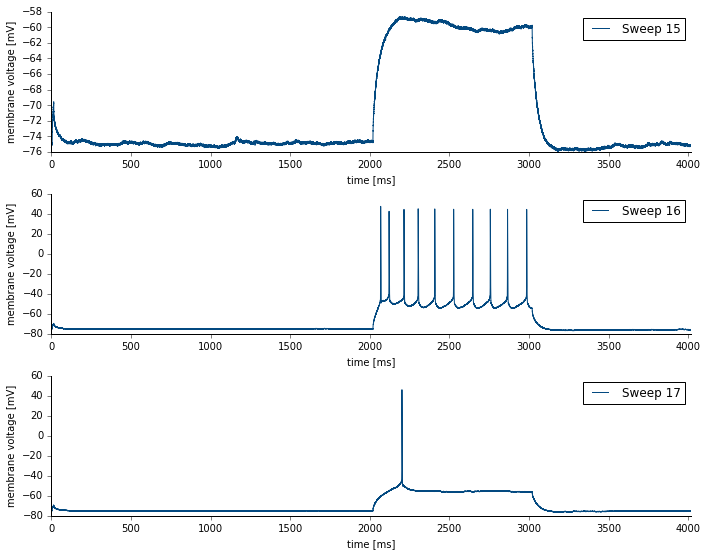

In [5]:
# plot the recorded signals
plotter = Plotter(lines=ts_count, width=1000, height=700)
for i in range(ts_count):
    plotter.add(time_series[i], subplot=i)
    
plotter.plot()

## Plot time series together with the stimulus

The stimuli represented as **MultiTag** elements contain all information about a stimulus: start times (positions), durations (extents) and the injected current (tag feature data).
In the next step we will use this information to plot each time series together with the stimulus that was applied in the respective experiment.

In [6]:
# get the tags
tags = list(block.multi_tags)

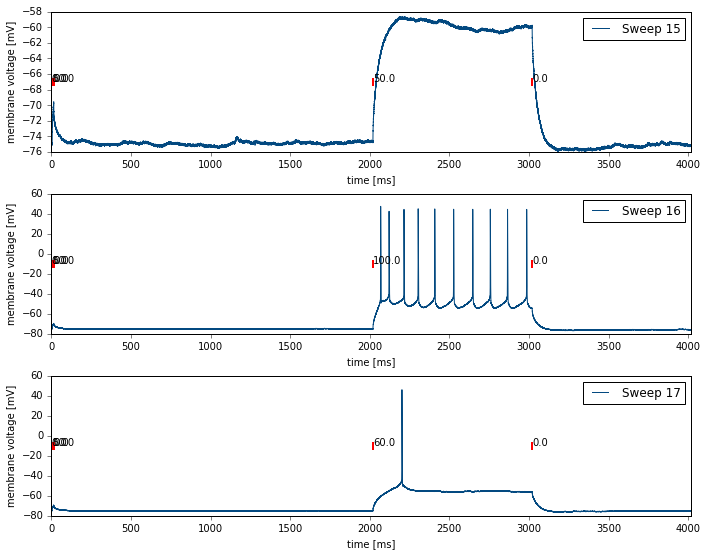

In [7]:
# plot the data
plotter = Plotter(lines=ts_count, width=1000, height=700)
for i, tag in enumerate(tags):
    plotter.add(tag.references[0], subplot=i)
    plotter.add(tag.positions, subplot=i, color="red", labels=tag.features[0].data)
        
plotter.plot()

In [8]:
f.close()